In [1]:
import numpy as np
import torchio as tio
import torch
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]
from datetime import datetime

In [2]:
bench_data = np.load('ct_train_1001_image.256256128.npy')
bench_data = np.expand_dims(bench_data, axis=(0))

bench_data = torch.from_numpy(bench_data)


In [3]:
print(bench_data.shape)

torch.Size([1, 256, 256, 128])


## Benchmark Noise

torch.Size([1, 256, 256, 128])


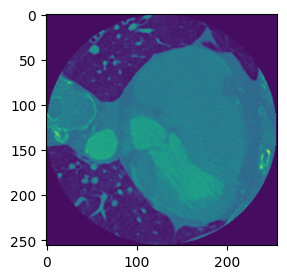

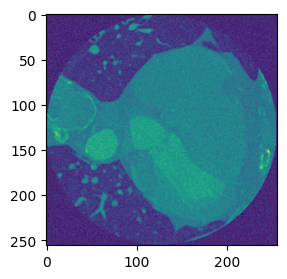

In [4]:
noise_transform = tio.RandomNoise(std=100)

transformed_tensor = noise_transform(bench_data)

print(transformed_tensor.shape)


plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor.numpy()[0][:,:,54])
plt.show()


In [5]:
start_time = datetime.now()

for i in range(100):
    transformed_tensor = noise_transform(bench_data)
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 100)
print((float(time/100) / 1000000), 'millisec')

72589980 nanoseconds
72.58998 millisec


## Benchmark Blur

torch.Size([1, 256, 256, 128])


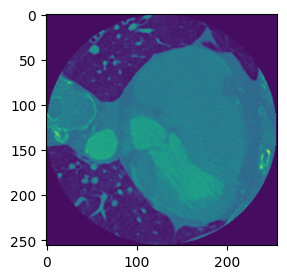

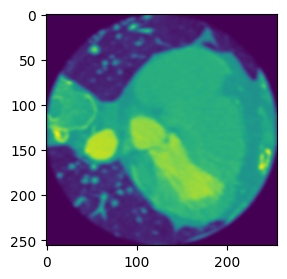

In [6]:
blur_transform = tio.RandomBlur()

transformed_tensor = blur_transform(bench_data)

print(transformed_tensor.shape)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor.numpy()[0][:,:,54])
plt.show()

In [7]:
start_time = datetime.now()

for i in range(100):
    transformed_tensor = blur_transform(bench_data)
      
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 100)
print((float(time/100) / 1000000), 'millisec')    

190900000 nanoseconds
190.9 millisec


## Benchmark Flip

torch.Size([1, 256, 256, 128])


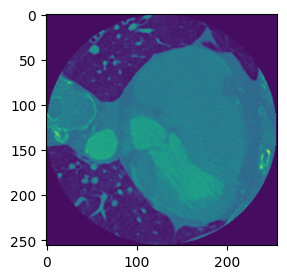

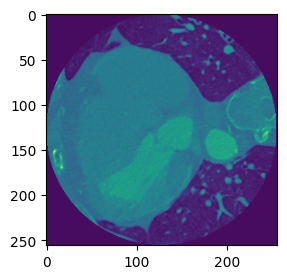

In [8]:
flip_transform = tio.Flip(axes=1)

transformed_tensor = flip_transform(bench_data)

print(transformed_tensor.shape)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor.numpy()[0][:,:,54])
plt.show()

In [9]:
start_time = datetime.now()

for i in range(1000):
    transformed_tensor = flip_transform(bench_data)

    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 1000)
print((float(time/1000) / 1000000), 'millisec')    

15436057 nanoseconds
15.436057 millisec


## Benchmark Affine transform

torch.Size([1, 256, 256, 128])


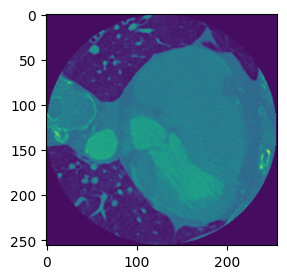

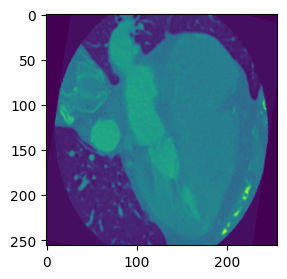

In [10]:
affine_transform = tio.RandomAffine(scales=(0.9, 1.2), degrees=15,)

transformed_tensor = affine_transform(bench_data)

print(transformed_tensor.shape)


plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor.numpy()[0][:,:,54])
plt.show()

In [11]:
start_time = datetime.now()

for i in range(100):
    transformed_tensor = affine_transform(bench_data)

      
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 100)
print((float(time/100) / 1000000), 'millisec')      

155960010 nanoseconds
155.96001 millisec


## Benchmark Crop

In [12]:
data = tio.Subject(image = tio.ScalarImage(tensor=bench_data))
transform = tio.CropOrPad((200, 200, 100))
transformed = transform(data)
print(transformed.image.shape)

(1, 200, 200, 100)


In [13]:
start_time = datetime.now()

for i in range(10000):
    transformed = transform(data)
    
      
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 10000)
print((float(time/10000) / 1000000), 'millisec')    

5151000 nanoseconds
5.151 millisec


## Benchmark Resize

torch.Size([1, 200, 200, 100])


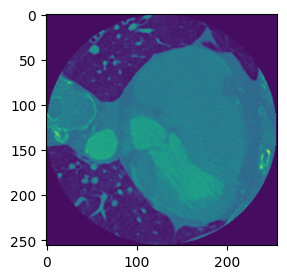

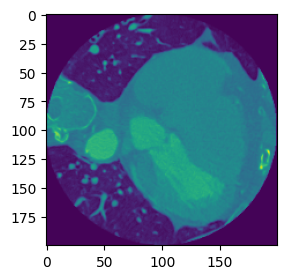

In [14]:
resize_transform = tio.Resize(target_shape = (200,200,100))

transformed_tensor = resize_transform(bench_data)

print(transformed_tensor.shape)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor.numpy()[0][:,:,42])
plt.show()

In [15]:
start_time = datetime.now()

for i in range(100):
    transformed = resize_transform(bench_data)
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 100)
print((float(time/100) / 1000000), 'millisec')    

104739960 nanoseconds
104.73996 millisec
